<a href="https://colab.research.google.com/github/2303A52164/Generative_ai_2025/blob/main/Generative_AI_2303A52164_Week_No_8_Assignment_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Assignment - 8.3**

# **1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below. Train, test, save (.h5) and deploy the model to predict the quality of wine using the Keras deep learning library**
# **2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall, precision and F1-score.**
# **3. (1 ponto) Build the application by loading the saved ANN model**

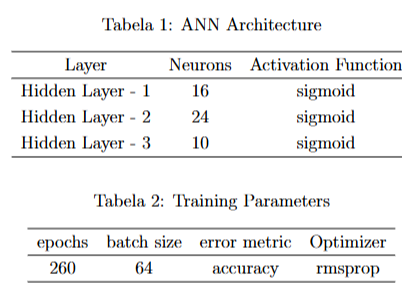

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("/content/winequality-red.csv")

In [4]:
# Split into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values   # Last column (target)

In [5]:
# Convert target to binary classification (e.g., good quality vs. bad quality)
y = (y >= 6).astype(int)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [9]:
# Define the ANN model
model = Sequential([
    Dense(16, activation="sigmoid", input_shape=(X_train.shape[1],)),
    Dense(24, activation="sigmoid"),
    Dense(10, activation="sigmoid"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer=RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=260, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5279 - loss: 0.7021 - val_accuracy: 0.5594 - val_loss: 0.6854
Epoch 2/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5282 - loss: 0.6908 - val_accuracy: 0.5594 - val_loss: 0.6847
Epoch 3/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5375 - loss: 0.6876 - val_accuracy: 0.5594 - val_loss: 0.6839
Epoch 4/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5351 - loss: 0.6870 - val_accuracy: 0.5594 - val_loss: 0.6822
Epoch 5/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5331 - loss: 0.6846 - val_accuracy: 0.5594 - val_loss: 0.6800
Epoch 6/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5364 - loss: 0.6830 - val_accuracy: 0.5594 - val_loss: 0.6765
Epoch 7/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5374 - loss: 0.6791 - val_accuracy: 0.5750 - val_loss: 0.6729
Epoch 8/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5602 - loss: 0.6724 - val_accuracy: 0.62

In [12]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7515 - loss: 0.4996  


In [13]:
# Predict classes
y_pred = (model.predict(X_test) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [14]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Low Quality", "High Quality"])

In [15]:
# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(report)

Test Accuracy: 0.7469
              precision    recall  f1-score   support

 Low Quality       0.70      0.74      0.72       141
High Quality       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.75      0.75       320



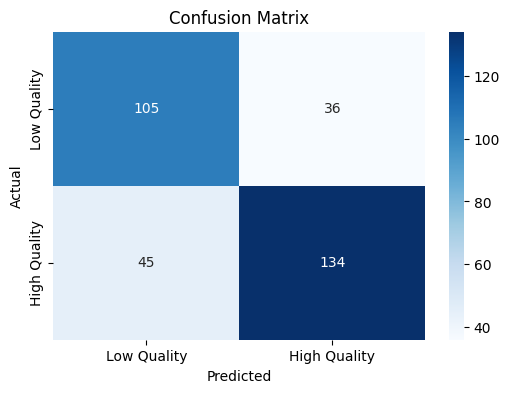

In [16]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Quality", "High Quality"],
            yticklabels=["Low Quality", "High Quality"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Save the trained model
model.save("wine_quality_ann_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [18]:
# Load the trained model and scaler
def load_trained_model():
    return load_model("wine_quality_ann_model.h5"), joblib.load("scaler.pkl")

In [19]:
# Predict function
def predict_wine_quality(input_data):
    model, scaler = load_trained_model()
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return "High Quality" if prediction > 0.5 else "Low Quality"

In [20]:
# Example input
sample_input = [7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]  # Replace with real data
result = predict_wine_quality(sample_input)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: Low Quality
